In [1]:
#Install gdown library 
!pip install gdown


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Download file in Jupyter notebook
import gdown

file_id = "17BeIHh895757g-vIq_knX00fSppwchw2"
url = f"https://drive.google.com/uc?id={file_id}"

output = 'new_cleaned_data_two.csv'  # Specify your desired output file name
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17BeIHh895757g-vIq_knX00fSppwchw2
To: /Users/jasminemoniquecooper/new_cleaned_data_two.csv
100%|██████████████████████████████████████| 3.83M/3.83M [00:00<00:00, 9.10MB/s]


'new_cleaned_data_two.csv'

In [3]:
import pandas as pd 
churn_clean_data = pd.read_csv (output)
pd.set_option('display.max_columns', None)
churn_clean_data.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,0.005273,68.000000,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,Urban,America/Detroit,"Programmer, multimedia",1.000000,27.000000,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,Urban,America/Los_Angeles,Chief Financial Officer,4.000000,50.000000,Regular High School Diploma,Student,21157.834718,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,Suburban,America/Los_Angeles,Solicitor,1.000000,48.000000,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,Suburban,America/Chicago,Medical illustrator,0.000000,83.000000,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701.0,Urban,America/New_York,Chief Technology Officer,3.000000,83.000000,No Schooling Completed,Full Time,34632.250245,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535.0,Suburban,America/New_York,"Surveyor, hydrographic",0.000000,63.313012,Associate's Degree,Full Time,11467.500000,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144.0,Suburban,America/Chicago,Sales promotion account executive,2.000000,63.664165,Bachelor's Degree,Full Time,26759.640000,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,54.818248,114.754111,979.612708,2,2,2,5,2,3,4,5
8,9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351.0,Suburban,America/New_York,Teaching laboratory technician,2.000000,49.000000,"Some College, Less than 1 Year",Full Time,58634.510000,Separated,Prefer not to answer,No,6.637259,20,2,3,No,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,10,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,

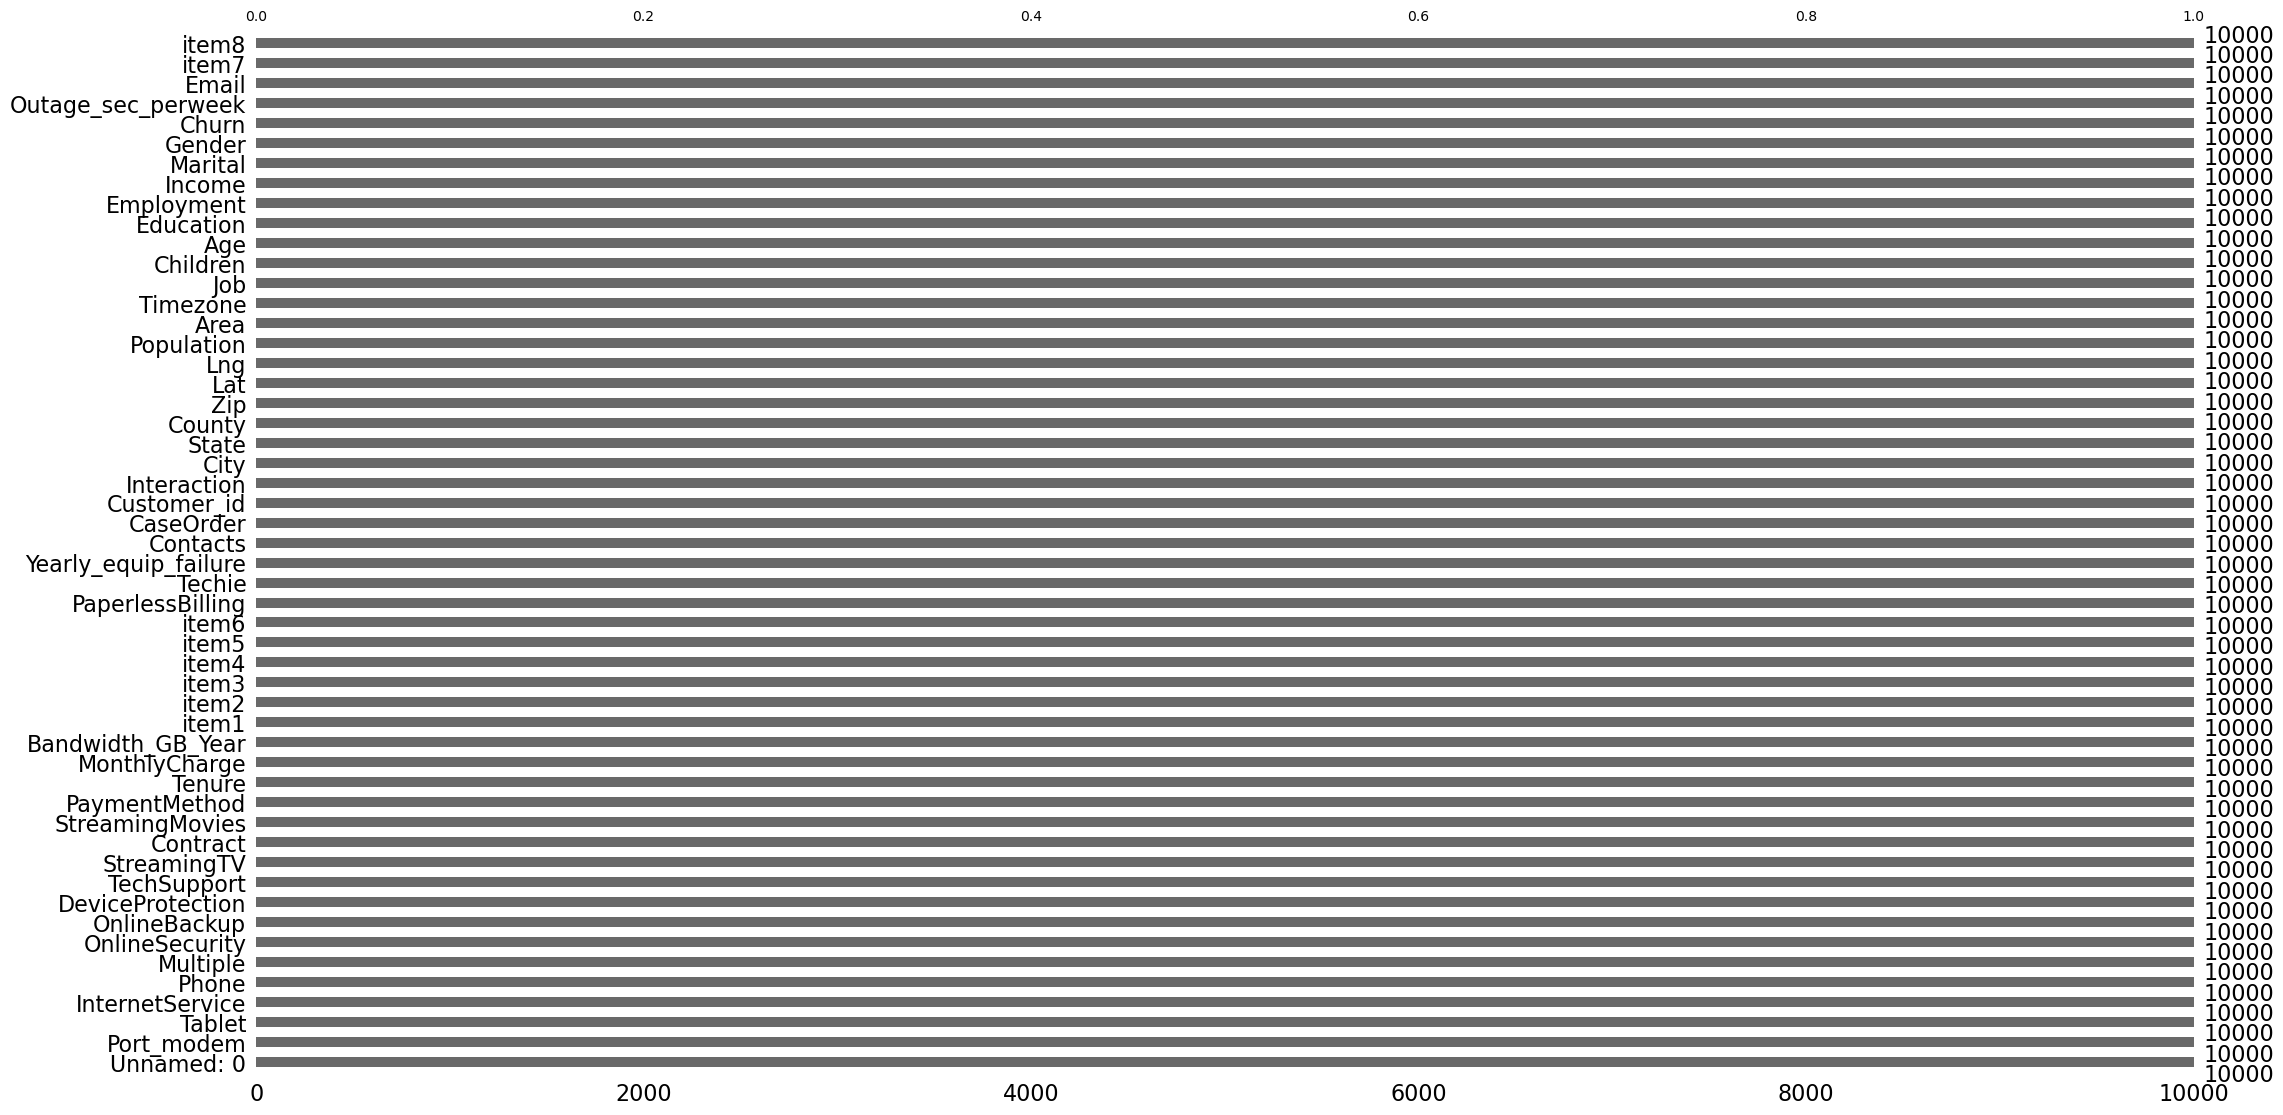

In [4]:
#ensure I pulled correct data 
import missingno as msno
import matplotlib.pyplot as plt
column_order = churn_clean_data.isnull().sum().sort_values().index
msno.bar(churn_clean_data[column_order])
plt.show()

In [3]:
# Select columns needed for analysis 
selected_columns = ['Area', 'Churn', 'Contract', 'Multiple', 'StreamingTV', 'StreamingMovies', 
                    'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

churn_selected_data = churn_clean_data[selected_columns]

#one hot encoding 
columns=['Area', 'PaymentMethod', 'Contract','Multiple','StreamingTV', 'StreamingMovies']
churn_encoded = pd.get_dummies(churn_selected_data, columns=columns, drop_first = True)

#Map the "Churn" variable to numeric values

churn_encoded["Churn"] = (churn_encoded["Churn"] == 'Yes').astype(int)

# Rename columns for proper Python syntax
column_name_mapping = {
    "PaymentMethod_Bank Transfer(automatic)": "Bank_Transfer",
    "PaymentMethod_Credit Card (automatic)": "Credit_Card", 
    "PaymentMethod_Electronic Check": "Electronic_Check", 
    "PaymentMethod_Mailed Check": "Mailed_Check",
    "Area_Suburban": "Suburban",
    "Area_Urban": "Urban", 
    "Area_Rural": "Rural"
}

churn_encoded.rename(columns=column_name_mapping, inplace=True)

churn_encoded.head(10)

,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Credit_Card,Electronic_Check,Mailed_Check,Contract_One year,Contract_Two Year,Multiple_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,6.795513,171.449762,904.536110,0,1,1,0,0,1,0,0,0,1
1,1,1.156681,242.948015,800.982766,0,1,0,0,0,0,0,1,1,1
2,0,15.754144,159.440398,2054.706961,0,1,1,0,0,0,1,1,0,1
3,0,17.087227,120.249493,2164.579412,1,0,0,0,1,0,1,0,1,0
4,1,1.670972,150.761216,271.493436,1,0,0,0,1,0,0,0,1,0
5,0,7.000994,184.401558,1039.357983,0,1,0,1,0,1,0,1,0,1
6,1,13.236774,200.064886,1907.242972,1,0,0,1,0,0,0,0,1,1
7,1,54.818248,114.754111,979.612708,1,0,0,0,1,0,0,0,0,0
8,0,8.220686,118.366844,1312.874964,1,0,0,0,0,0,0,0,0,0
9,0,3.422086,163.005280,508.763791,0,0,0,0,1,0,1,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
# Split data into test and training data sets
X = churn_encoded.drop('Churn', axis=1)
y = churn_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

In [5]:
#creating the files 

X_train.to_csv('/Users/jasminemoniquecooper/Downloads/X_train_dt.csv', index=False)
X_test.to_csv('/Users/jasminemoniquecooper/Downloads/X_test_dt.csv', index=False)
y_train.to_csv('/Users/jasminemoniquecooper/Downloads/y_train_dt.csv', index=False, header=True)
y_test.to_csv('/Users/jasminemoniquecooper/Downloads/y_test_dt.csv', index=False, header=True)

In [6]:
#check to make sure the train test split is accurate 

df_1 = pd.read_csv('/Users/jasminemoniquecooper/Downloads/X_train_dt.csv')
df_2 = pd.read_csv('/Users/jasminemoniquecooper/Downloads/X_test_dt.csv')
df_3 = pd.read_csv('/Users/jasminemoniquecooper/Downloads/y_train_dt.csv')
df_4 = pd.read_csv('/Users/jasminemoniquecooper/Downloads/y_test_dt.csv')

# Get the number of rows
num_rows_1 = df_1.shape[0]
num_rows_2 = df_2.shape[0]
num_rows_3 = df_3.shape[0]
num_rows_4 = df_4.shape[0]

print(f'The CSV file has {num_rows_1} rows.')
print(f'The CSV file has {num_rows_2} rows.')
print(f'The CSV file has {num_rows_3} rows.')
print(f'The CSV file has {num_rows_4} rows.')

The CSV file has 8000 rows.
The CSV file has 2000 rows.
The CSV file has 8000 rows.
The CSV file has 2000 rows.


In [7]:
#hyperparameter tuning 

#inspecting hyperparameters 

from sklearn.tree import DecisionTreeClassifier 
SEED = 1
dt = DecisionTreeClassifier(random_state = SEED)
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [8]:
#hyperparameter tuning 

from sklearn.model_selection import GridSearchCV

params_dt = {
            'max_depth' : [2, 3, 4, 5, 6], 
            'min_samples_leaf' : [5,10, 15, 20], 
            'max_features' : [1, 2, 3, 4, 5]
}

grid_dt = GridSearchCV (estimator=dt, 
                        param_grid = params_dt,
                        scoring = 'accuracy',
                        cv = 10,
                        n_jobs =-1)

In [9]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [10]:
best_hyperparams = grid_dt.best_params_
print(best_hyperparams)

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 20}


In [11]:
best_CV_score = grid_dt.best_score_
print(best_CV_score)

0.8553750000000001


In [12]:
best_model = grid_dt.best_estimator_
test_acc = best_model.score(X_test, y_test)
print(test_acc)

0.853


In [13]:
from sklearn.metrics import roc_auc_score 
y_pred_proba = best_model.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score (y_test, y_pred_proba)
print(test_roc_auc)

0.9136112180721345


In [14]:
#decision tree classification analysis 
from sklearn.metrics import accuracy_score
y_pred = grid_dt.predict(X_test) 
accuracy_score(y_test, y_pred)

0.853

In [15]:
optimal_dt = DecisionTreeClassifier(**best_hyperparams)
optimal_dt.fit(X_train, y_train)
y_pred_optimal = optimal_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_optimal)
print(accuracy)

0.8405


In [16]:
#confusion matrix (L TO R) TN, FP, FN, TP 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_optimal)
print(cm)

[[1351  119]
 [ 200  330]]


In [17]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1470
           1       0.73      0.62      0.67       530

    accuracy                           0.84      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.83      0.84      0.84      2000



In [18]:
#mean squared error 
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, y_pred_optimal))

0.1595


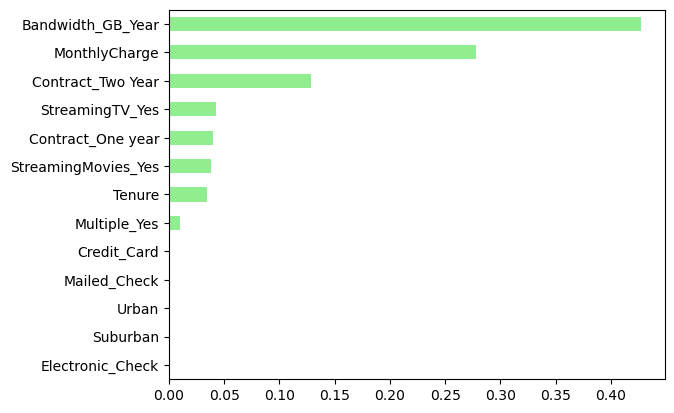

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

importances = pd.Series(data=grid_dt.best_estimator_.feature_importances_, index=X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.show()
